In [1]:
%matplotlib inline
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

In [2]:
df = pd.read_csv('data/games.csv', lineterminator='\n')

In [3]:
df.shape

(5158, 18)

In [4]:
df.head().transpose()

,0,1,2,3,4
title,10 Second Ninja X,1000 Top Rated,1001 Spikes,100ft Robot Golf,101 Ways to Die
platform,PlayStation 4,PlayStation 4,PlayStation 4,PlayStation 4,PlayStation 4
developer,GameDesignDan,Top Rated,Nicalis,No Goblin,4 Door Lemon
genre,"['Action', 'Platformer', '2D']","['Miscellaneous', 'Party / Minigame']","['Action', 'Platformer', 'Platformer', '2D', '...","['Sports', 'Individual', 'Golf', 'Arcade']","['Action', 'Platformer', '2D']"
rating,T,NaN,T,E10+,T
release_date,2016-07-19,2017-06-27,2014-06-03,2017-09-27,2016-03-22
summary,If you want a cheesy story to go along with a ...,"This game is a puzzle game, but it's more like...",If you miss the crippling difficulty of the NE...,100ft Robot Golf is a real-time golf game thro...,A game that makes me laugh and want to play mo...
meta_score,76,0,78,56,60
meta_overview,Generally favorable reviews,No score yet,Generally favorable reviews,Mixed or average reviews,Mixed or average reviews
meta_pos,11,0,6,3,1


In [12]:
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
sns.set_style(style='whitegrid')

### General

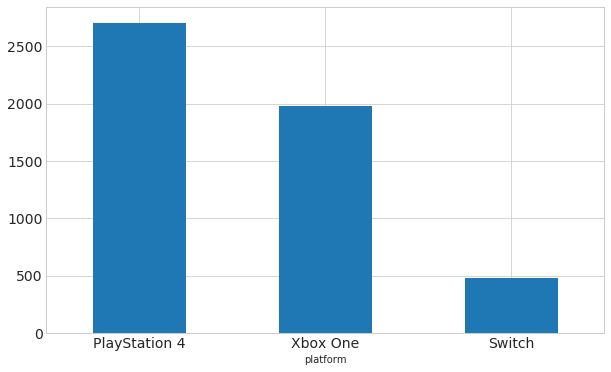

In [13]:
df.groupby('platform')['title'].count().sort_values(ascending=False).plot.bar(figsize=(10, 6), rot=0);

In [151]:
df.loc[df['developer'] == 'EA Sports, EA Vancouver', 'developer'] = 'EA Sports'
df.loc[df['developer'] == 'EA Vancouver', 'developer'] = 'EA Sports'

In [152]:
tmp = df.loc[(df['meta_overview'] != 'No score yet') & (df['user_overview'] != 'No user score yet')].copy()

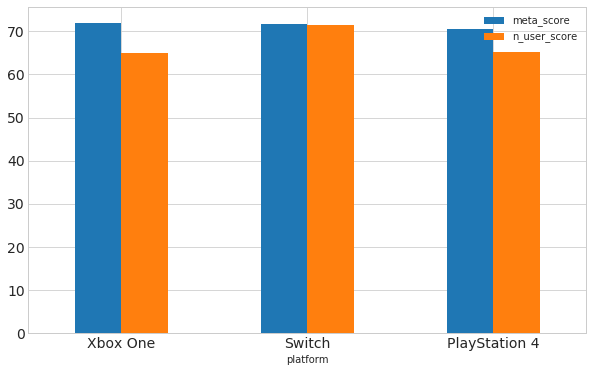

In [14]:
tmp.groupby('platform')['meta_score', 'n_user_score'].mean().sort_values('meta_score', ascending=False).plot.bar(figsize=(10, 6), rot=0);

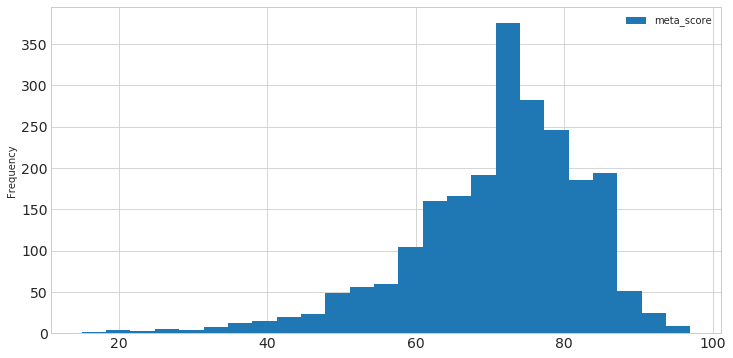

In [18]:
tmp[['meta_score']].plot.hist(bins=25, figsize=(12, 6));

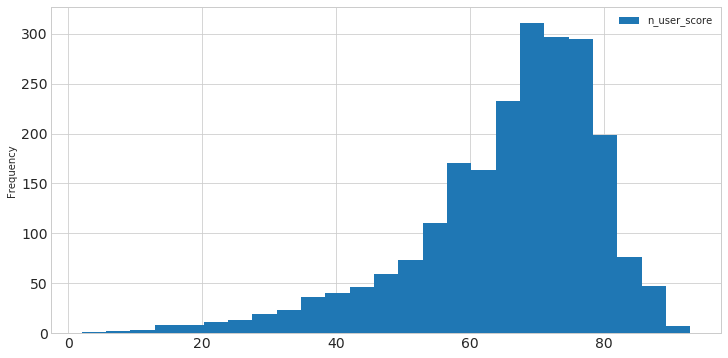

In [19]:
tmp[['n_user_score']].plot.hist(bins=25, figsize=(12, 6));

In [27]:
ps4 = tmp.loc[tmp['platform'] == 'PlayStation 4']

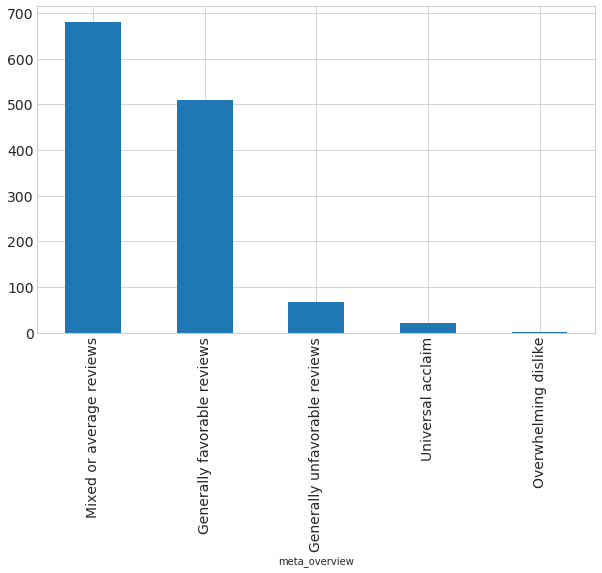

In [44]:
ps4.groupby('meta_overview')['title'].count().sort_values(ascending=False).plot.bar(figsize=(10, 6));

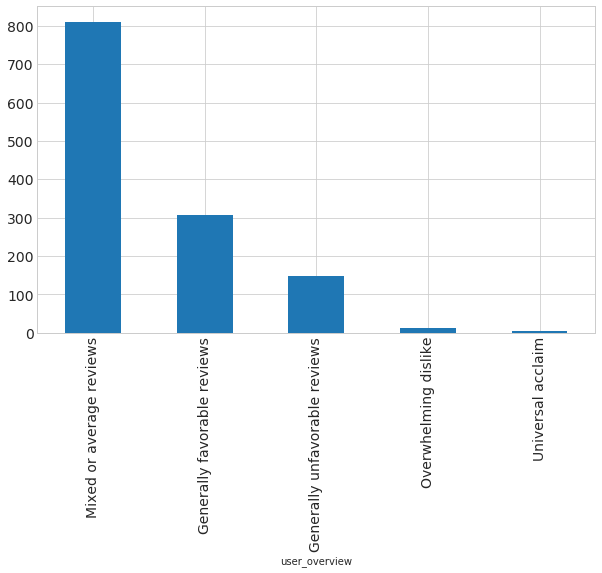

In [45]:
ps4.groupby('user_overview')['title'].count().sort_values(ascending=False).plot.bar(figsize=(10, 6));

In [23]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['month'] = df['release_date'].dt.month
df['year'] = df['release_date'].dt.year

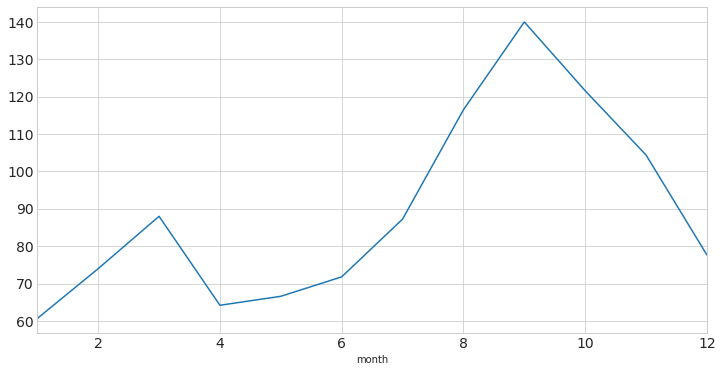

In [25]:
df.groupby(['year', 'month'])['title'].count().groupby('month').mean().plot(figsize=(12, 6));

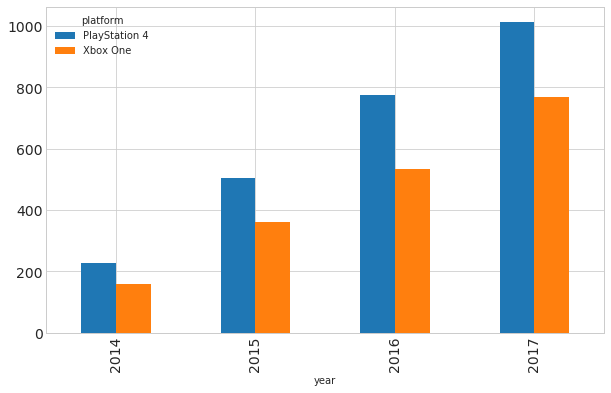

In [53]:
df.loc[(df['year'] > 2013) & (df['year'] < 2018) & (df['platform'] != 'Switch')].groupby(['year', 'platform'])['title'].count().unstack().plot.bar(figsize=(10, 6));

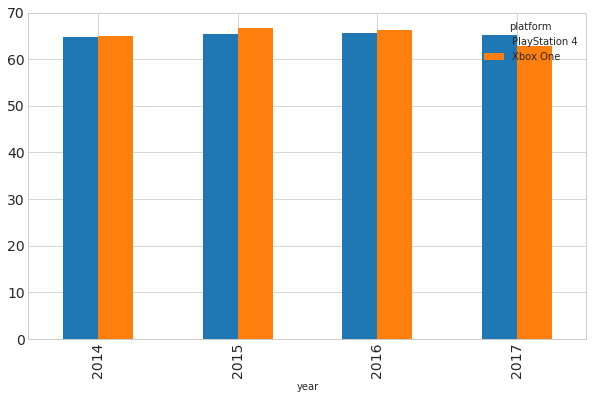

In [76]:
tmp.loc[(tmp['year'] > 2013) & (tmp['year'] < 2018) & (tmp['platform'] != 'Switch')].groupby(['year', 'platform'])['n_user_score'].mean().unstack().plot.bar(figsize=(10, 6));

In [83]:
tmp.loc[tmp['meta_score'] >= 90].groupby('platform')['title'].count().sort_values(ascending=False)

platform
PlayStation 4    22
Xbox One         14
Switch            7
Name: title, dtype: int64

In [89]:
tmp.loc[tmp['n_user_score'] >= 90].groupby('platform')['title'].count().sort_values(ascending=False)

platform
PlayStation 4    5
Xbox One         2
Name: title, dtype: int64

In [153]:
tmp['dif'] = tmp['meta_score'] - tmp['n_user_score']

In [154]:
ps4 = tmp.loc[tmp['platform'] == 'PlayStation 4']
xone = tmp.loc[tmp['platform'] == 'Xbox One']
switch = tmp.loc[tmp['platform'] == 'Switch']

In [87]:
ps4.loc[ps4['meta_score'] >= 90, ('title', 'meta_score')].sort_values('meta_score', ascending=False).reset_index(drop=True)

,title,meta_score
0,Grand Theft Auto V,97
1,The Last of Us Remastered,95
2,XCOM 2: War of the Chosen,94
3,Persona 5,93
4,Uncharted 4: A Thief's End,93
5,Metal Gear Solid V: The Phantom Pain,93
6,Undertale,92
7,The Witcher 3: Wild Hunt,92
8,Shadow of the Colossus,92
9,Bloodborne,92


In [90]:
ps4.loc[ps4['n_user_score'] >= 90, ('title', 'n_user_score')].sort_values('n_user_score', ascending=False).reset_index(drop=True)

,title,n_user_score
0,Bloodborne: The Old Hunters,93.0
1,The Witcher 3: Wild Hunt,92.0
2,Persona 5,91.0
3,The Last of Us Remastered,91.0
4,Shadow of the Colossus,90.0


In [88]:
xone.loc[xone['meta_score'] >= 90, ('title', 'meta_score')].sort_values('meta_score', ascending=False).reset_index(drop=True)

,title,meta_score
0,Grand Theft Auto V,97
1,Metal Gear Solid V: The Phantom Pain,95
2,Celeste,94
3,The Witcher 3: Wild Hunt - Blood and Wine,94
4,INSIDE,93
5,Monster Hunter: World,93
6,The Swapper,92
7,What Remains of Edith Finch,92
8,Forza Horizon 3,91
9,Overwatch,91


In [91]:
xone.loc[xone['n_user_score'] >= 90, ('title', 'n_user_score')].sort_values('n_user_score', ascending=False).reset_index(drop=True)

,title,n_user_score
0,The Witcher 3: Wild Hunt,92.0
1,The Witcher 3: Wild Hunt - Hearts of Stone,91.0


In [96]:
ps4.loc[ps4['meta_score'] >= 90, ('title', 'meta_score', 'n_user_score', 'dif')].sort_values('meta_score', ascending=False).reset_index(drop=True)

,title,meta_score,n_user_score,dif
0,Grand Theft Auto V,97,83.0,14.0
1,The Last of Us Remastered,95,91.0,4.0
2,XCOM 2: War of the Chosen,94,61.0,33.0
3,Persona 5,93,91.0,2.0
4,Uncharted 4: A Thief's End,93,83.0,10.0
5,Metal Gear Solid V: The Phantom Pain,93,82.0,11.0
6,Undertale,92,64.0,28.0
7,The Witcher 3: Wild Hunt,92,92.0,0.0
8,Shadow of the Colossus,92,90.0,2.0
9,Bloodborne,92,89.0,3.0


In [99]:
ps4.sort_values('dif', ascending=False)[:20][['title', 'meta_score', 'n_user_score', 'dif']].reset_index(drop=True)

,title,meta_score,n_user_score,dif
0,NBA 2K18,80,16.0,64.0
1,Star Wars Battlefront II,68,10.0,58.0
2,Call of Duty: Infinite Warfare - Sabotage,76,18.0,58.0
3,Pinball FX 2: Star Wars Pinball - Rogue One,74,22.0,52.0
4,Call of Duty: Infinite Warfare - Continuum,75,25.0,50.0
5,Super Rude Bear Resurrection,78,28.0,50.0
6,FIFA 18,84,34.0,50.0
7,Call of Duty: WWII - The Resistance,73,24.0,49.0
8,Call of Duty: Black Ops III - Salvation,74,27.0,47.0
9,Chime Sharp,76,29.0,47.0


In [150]:
ps4.loc[ps4['n_user_score'] > 86, ('title', 'n_user_score', 'meta_score', 'dif')].sort_values('n_user_score', ascending=False).reset_index(drop=True)

,title,n_user_score,meta_score,dif
0,Bloodborne: The Old Hunters,93.0,87,-6.0
1,The Witcher 3: Wild Hunt,92.0,92,0.0
2,Persona 5,91.0,93,2.0
3,The Last of Us Remastered,91.0,95,4.0
4,Shadow of the Colossus,90.0,92,2.0
5,Bloodborne,89.0,92,3.0
6,AO Tennis,89.0,44,-45.0
7,Dark Souls III,89.0,89,0.0
8,Okami HD,88.0,88,0.0
9,NieR: Automata,88.0,88,0.0


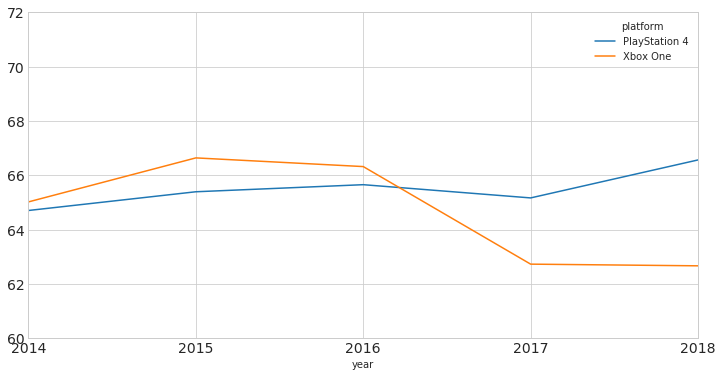

In [144]:
tmp.loc[(tmp['year'] > 2013) & (tmp['platform'] != 'Switch')].groupby(['platform', 'year'])['n_user_score'].mean().unstack().transpose().plot(figsize=(12, 6), xticks=np.arange(2014, 2019, 1), yticks=np.arange(60, 74, 2));

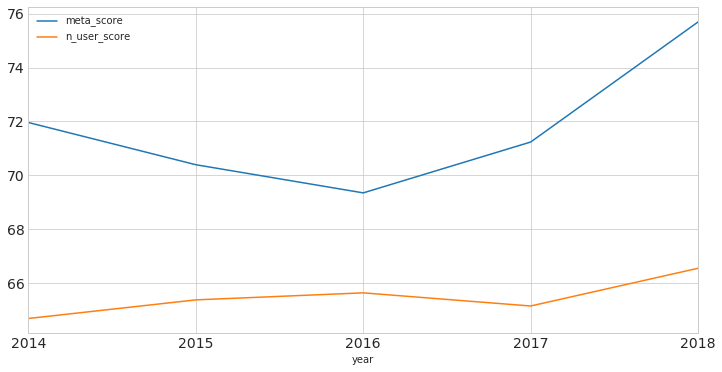

In [143]:
ps4.loc[ps4['year'] > 2013].groupby('year')[['meta_score', 'n_user_score']].mean().plot(figsize=(12, 6), xticks=np.arange(2014, 2019, 1));

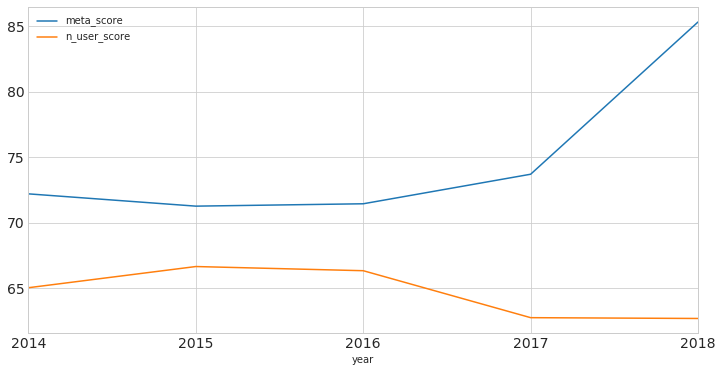

In [139]:
xone.loc[(xone['year'] > 2013)].groupby('year')[['meta_score', 'n_user_score']].mean().plot(figsize=(12, 6), xticks=np.arange(2014, 2019, 1));

### Developers

In [177]:
ps4.groupby('developer')['title'].count().sort_values(ascending=False)[:10]

developer
Telltale Games      48
Capcom              28
EA Sports           17
Omega Force         16
Square Enix         16
Zen Studios         16
Ubisoft Montreal    14
TT Games            11
Io Interactive       8
Arc System Works     8
Name: title, dtype: int64

In [202]:
dev = pd.concat([ps4.groupby('developer')['title'].count(), ps4.groupby('developer')['n_user_score'].mean(), ps4.groupby('developer')['meta_score'].mean()], axis=1)

In [203]:
dev.columns = ['count', 'n_user_score_avg', 'meta_score_avg']

In [204]:
dev.sort_values('count', ascending=False)[:10]

,count,n_user_score_avg,meta_score_avg
developer,,,
Telltale Games,48,62.645833,72.895833
Capcom,28,69.357143,74.785714
EA Sports,17,49.058824,73.352941
Zen Studios,16,56.000000,79.125000
Omega Force,16,70.937500,71.062500
Square Enix,16,68.687500,75.937500
Ubisoft Montreal,14,70.642857,74.785714
TT Games,11,71.818182,72.818182
Arc System Works,8,76.500000,77.625000


In [205]:
dev.sort_values('n_user_score_avg', ascending=False)[:10]

,count,n_user_score_avg,meta_score_avg
developer,,,
Atlus,1,91.000000,93.000000
"Bluepoint Games, SCE Japan Studio",1,90.000000,92.000000
CD Projekt Red Studio,3,89.000000,91.000000
Ryu ga Gotoku Studios,2,87.000000,82.500000
"SegaSoft, Sega, PagodaWest Games",1,87.000000,86.000000
2K Games,1,86.000000,84.000000
"Psyonix, Panic Button",1,86.000000,85.000000
YummyYummyTummy,1,85.000000,64.000000
Naughty Dog,3,84.666667,90.666667


In [206]:
dev.loc[dev['count'] > 4].sort_values('n_user_score_avg', ascending=False)[:10]

,count,n_user_score_avg,meta_score_avg
developer,,,
From Software,6,83.833333,84.666667
DONTNOD Entertainment,6,83.500000,80.166667
Spike Chunsoft,6,78.333333,77.000000
Arc System Works,8,76.500000,77.625000
CyberConnect2,5,76.400000,71.200000
SuperMassive Games,5,75.000000,69.200000
Tango Gameworks,5,74.800000,73.000000
Koei Tecmo Games,7,74.428571,73.571429
SCE Japan Studio,5,73.400000,72.800000


In [198]:
ps4.loc[ps4['developer'] == 'From Software', 'title'].reset_index(drop=True)

0                                 Bloodborne
1                Bloodborne: The Old Hunters
2    Dark Souls II: Scholar of the First Sin
3                             Dark Souls III
4          Dark Souls III: Ashes of Ariandel
5            Dark Souls III: The Ringed City
Name: title, dtype: object

In [200]:
ps4.loc[ps4['developer'] == 'DONTNOD Entertainment', 'title'].reset_index(drop=True)

0                              Life is Strange
1       Life is Strange: Episode 1 - Chrysalis
2     Life is Strange: Episode 2 - Out of Time
3    Life is Strange: Episode 3 - Chaos Theory
4       Life is Strange: Episode 4 - Dark Room
5       Life is Strange: Episode 5 - Polarized
Name: title, dtype: object

In [197]:
ps4.loc[ps4['developer'] == 'Arc System Works', 'title'].reset_index(drop=True)

0              Birthdays the Beginning
1            BlazBlue: Central Fiction
2    BlazBlue: Chrono Phantasma Extend
3                     Double Dragon IV
4                 Dragon Ball FighterZ
5          Guilty Gear Xrd -REVELATOR-
6               Guilty Gear Xrd -SIGN-
7               Guilty Gear Xrd: Rev 2
Name: title, dtype: object

In [209]:
dev = pd.concat([ps4.groupby('developer')['dif'].mean().sort_values(ascending=False), ps4.groupby('developer')['title'].count()], axis=1)

In [210]:
dev.columns = ['dif_avg', 'count']

In [212]:
dev.loc[dev['count'] > 4].sort_values('dif_avg', ascending=False)[:10]

,dif_avg,count
Infinity Ward,40.800000,5
Treyarch,31.600000,5
Bungie,31.333333,6
Visual Concepts,28.400000,5
EA Sports,24.294118,17
Zen Studios,23.125000,16
EA DICE,21.571429,7
The Odd Gentlemen,14.000000,5
Bethesda Game Studios,13.285714,7
Ubisoft,11.571429,7


In [223]:
ea = ps4.loc[ps4['developer'] == 'EA Sports', ['title', 'meta_score', 'n_user_score']].sort_values('meta_score', ascending=False)[:10]

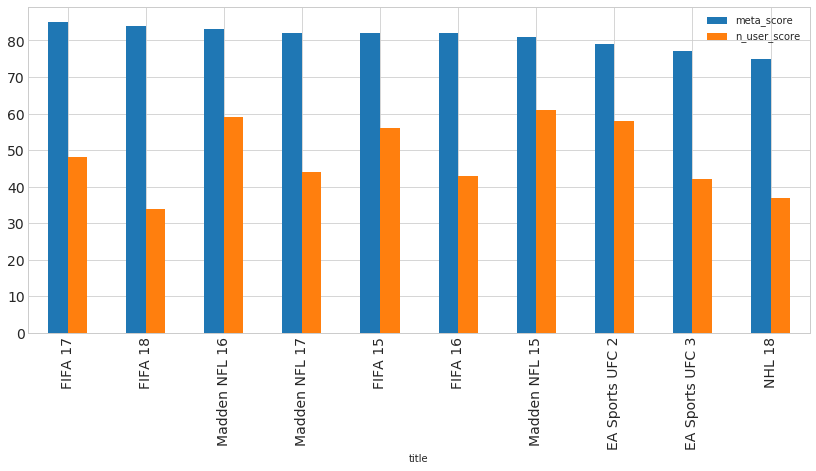

In [224]:
ea.set_index('title').plot.bar(figsize=(14, 6));

In [220]:
dev.loc[dev['count'] >= 4].sort_values('dif_avg')[:10]

,dif_avg,count
HB Studios Multimedia,-8.000000,4
Acquire,-7.750000,4
SuperMassive Games,-5.800000,5
Compile Heart,-5.250000,4
CyberConnect2,-5.200000,5
Gust,-5.000000,4
PlatinumGames,-3.600000,5
DONTNOD Entertainment,-3.333333,6
Media Vision,-2.750000,4
Deck Nine Games,-2.750000,4


### Rating

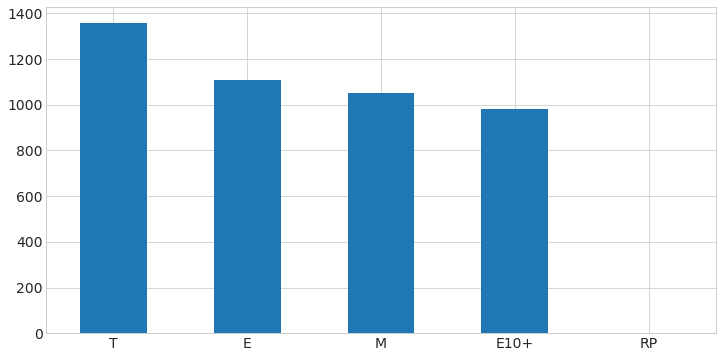

In [231]:
df['rating'].value_counts().plot.bar(figsize=(12, 6), rot=0);

In [248]:
qty = df.loc[(df['rating'].isnull() == False) & (df['rating'] != 'RP')].groupby('platform')['title'].count()

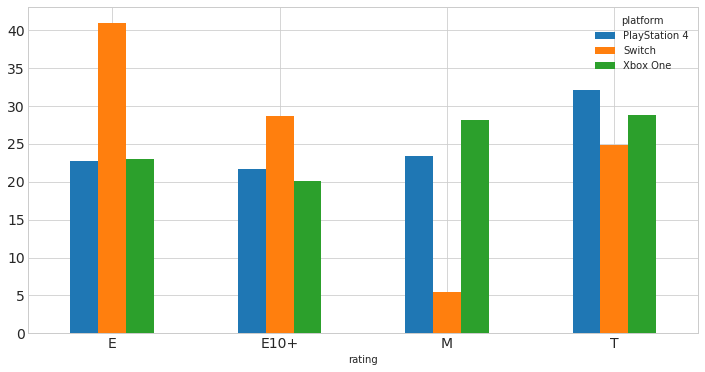

In [255]:
((df.loc[df['rating'] != 'RP'].groupby(['platform', 'rating'])['title'].count().unstack().transpose() / qty) * 100).plot.bar(figsize=(12, 6), rot=0);